<a href="https://colab.research.google.com/github/dasari2023/Code/blob/main/Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import image_data_format
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.models import Sequential
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import AvgPool2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
#from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import sys
import glob
import keras
import cv2
import csv
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7

In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import segmentation_models as sm

In [ ]:
import glob
import cv2
import os
images_t = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/Training/*.jpg")
images_t.sort()
images_v = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/Testing/*.jpg")
images_v.sort()
masks_t = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/*.tif")
masks_t.sort()
masks_v = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Testing Set/5. Optic Disc/*.tif")
masks_v.sort()
print(len(images_t))
print(len(images_v))
print(len(masks_t))
print(len(masks_v))

54
27
54
27


In [ ]:
for x in images_t:
    print(x)

/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_01.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_02.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_03.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_04.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_05.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_06.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_07.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_08.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_09.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_10.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_11.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_12.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_13.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_14.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_15.jpg
/content/d

In [ ]:
for x in masks_t:
    print(x)

/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_01_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_02_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_03_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_04_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_05_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_06_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_07_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_08_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Gro

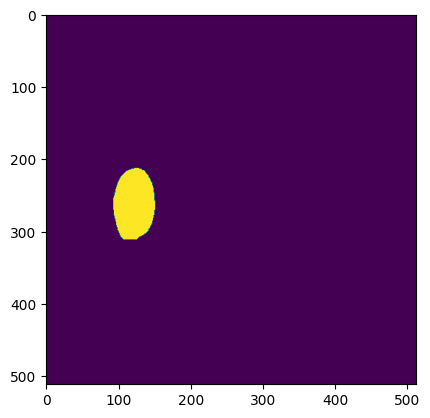

In [ ]:
import os
image_t=[]
image_v=[]
mask_t=[]
mask_v=[]
for x in images_t:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_t.append(im)
for x in images_v:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_v.append(im)
for y in masks_t:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_t.append(ma)
for y in masks_v:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_v.append(ma)

In [ ]:
print(len(image_t),len(mask_t))
img_array_t=np.array(image_t)
mask_array_t=np.array(mask_t)
mask_array_t=np.expand_dims(mask_array_t,axis=-1)
img_array_v=np.array(image_v)
mask_array_v=np.array(mask_v)
mask_array_v=np.expand_dims(mask_array_v,axis=-1)
mask_array_t=mask_array_t.astype(np.float32)
mask_array_v=mask_array_v.astype(np.float32)
print(img_array_t.shape)
print(mask_array_t.shape)
print((np.unique(mask_array_t)))
print(mask_array_t.shape)

54 54
(54, 512, 512, 3)
(54, 512, 512, 1)
[ 0. 76.]
(54, 512, 512, 1)


In [ ]:
a=np.where(mask_array_t==76)
mask_array_t[a]=1
print(np.unique(mask_array_t))
b=np.where(mask_array_v==76)
mask_array_v[b]=1
print(np.unique(mask_array_v))

[0. 1.]
[0. 1.]


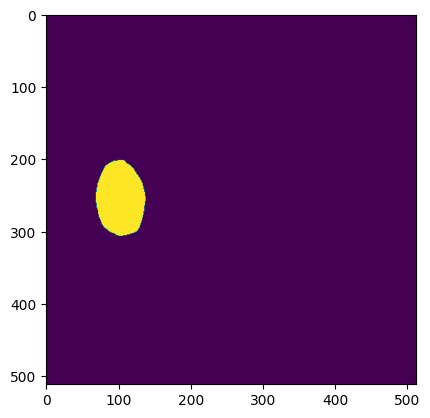

In [ ]:
plt.imshow(mask_array_t[20])

In [ ]:
x_train=list()
y_train=list()

dgtrain =glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Training/*.jpg')
ltrain =glob.glob('/content/drive/MyDrive/Dataset/Localization/Training/*.jpg')
strain =glob.glob('/content/drive/MyDrive/Dataset/Segmentation/Training/*.jpg')
for i in dgtrain:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(0)
for j in ltrain:
    img=cv2.imread(j,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(1)
for k in strain:
    img=cv2.imread(k,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(2)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
y_train=to_categorical(y_train)
x_train.shape
y_train.shape

(880, 3)

In [ ]:
x_test=list()
y_test=list()
dgtest = glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Testing/*.jpg')
#dgtest =glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Training/*.jpg')
ltest =glob.glob('/content/drive/MyDrive/Dataset/Localization/Testing/*.jpg')
stest =glob.glob('/content/drive/MyDrive/Dataset/Segmentation/Testing/*.jpg')
for i in dgtest:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(0)
for j in ltest:
    img=cv2.imread(j,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(1)
for k in stest:
    img=cv2.imread(k,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(2)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_test=to_categorical(y_test)
x_test.shape
y_test.shape

(233, 3)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121
#from keras.layers.convolutional import Conv2D
from keras.layers import LSTM

import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(150, 150, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(x_train, y_train, epochs=10)

29084464/29084464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 3)       12        
                                                                 
 batch_normalization (Batch  (None, 150, 150, 3)       12        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 150, 150, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 4096)              67

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
 !sklearn.metrics.ConfusionMatrixDisplay



/bin/bash: line 1: sklearn.metrics.ConfusionMatrixDisplay: command not found


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have a test dataset (x_test and y_test)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
confusion = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

# Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(model, x_test, y_true, display_labels=["Class1", "Class2", "Class3"])
plt.show()

# Plot Training & Validation Loss (if you have training data)
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy (if you have training data)
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

8/8 [==============================] - 4s 280ms/step
              precision    recall  f1-score   support

           0       0.50      0.17      0.26       103
           1       0.44      0.80      0.57       103
           2       0.40      0.15      0.22        27

    accuracy                           0.45       233
   macro avg       0.45      0.37      0.35       233
weighted avg       0.46      0.45      0.39       233

Confusion Matrix:
[[18 82  3]
 [18 82  3]
 [ 0 23  4]]


NameError: ignored

<Figure size 640x480 with 0 Axes>